# Project Title: Telecom Churn Analysis 

##### Project Type    - Exploratory data analysis (EDA)
##### Contribution    - Individual
##### Member           - Harshad Humane

## Project Overview:

Telecom churn analysis involves predicting customers likely to leave a service, a critical concern for telecom companies impacting revenue. The dataset from Orange Telecom holds cleaned customer data and churn labels, aiming to understand and tackle factors behind churn. The process begins with data acquisition, gathering customer details, usage patterns, and churn status. Cleaning ensures usable data, while visualization and summarization reveal trends and relationships.

Exploring the churn dataset unveils significant findings: charges relate directly to call durations, certain demographics like area codes might not matter, International Plan subscribers churn more, those with multiple service calls churn higher, heavy day/evening users leave more, but call volumes show no clear churn correlation. In summary, focusing on modifying the International Plan, proactive communication, periodic promotions, problem-state attention, top customer care, network maintenance, smooth onboarding, churn analysis, and continuous improvement can curb churn rates and enhance customer retention. Consistent communication and feedback-seeking uncover issues preemptively. Periodic promotions and special attention to problem areas in high-churn states help. Prioritizing top customers and resolving network issues minimize churn.

The proactive approach to retain customers involves strategic alterations like aligning International Plan charges with regular rates, prioritizing communication and feedback, occasional promotions, targeted solutions for high-churn areas, elite customer care, network optimization, streamlined onboarding, churn analysis for insights, and perpetual enhancements to stay competitive. Analysis of the churn dataset uncovers critical insights: charges correlate with call durations, demographics like area codes seem insignificant, International Plan subscribers churn more, multiple service calls hint at higher churn, heavy day/evening users tend to leave, while call volumes show no clear churn patterns.

In conclusion, telecom companies can mitigate churn by focusing on modifying plans, proactive strategies, targeted solutions, elite care, network upkeep, smooth onboarding, churn analysis, and ongoing improvements.

## Problem statement:

*Utilizing the Orange Telecom Churn Dataset, our objective is to investigate customer activity data to identify influential factors leading to subscription cancellations (churn). Through data exploration and analysis, the goal is to uncover key determinants of churn, enabling us to formulate actionable recommendations and strategies for enhancing customer retention.*

## Objective:

**Identify Churn Drivers**: To understand the factors that significantly contribute to customer churn. 

**Recommend Retention Strategies**: Based on data insights, providing effective measure for reducing churn rates, enhancing customer satisfaction, and promoting long-term subscription retention.

**To Provide Optimize Customer Retention**: Providing recommendations and initiatives derived from the analysis to proactively address identified churn factors, thereby improving overall customer retention rates and bolstering the telecom company's profitability and customer satisfaction metrics.

### Importing libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#To deal with the warnings
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [3]:
data = pd.read_csv('C:\\Users\\harsh\\OneDrive\\Desktop\\My Content\\Data science\\Datasets\\Telecom Churn.csv')

In [4]:
# making copy of dataset
df = data.copy()

### Knowing our data

In [5]:
# First look of dataset
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Feature definition 

*State*              - 51 Unique States in United States of America  
*Account Length*     - Length of The Account  
*Area Code*          - 415 relates to San Francisco,408 is of San Jose and 510 is of City of Oakland  
*International Plan* - Yes Indicate International Plan is Present and No Indicates no subscription for International Plan  
*VoiceMail Plan*     - Yes Indicates Voicemail Plan is Present and No Indicates no subscription forVoiceMail Plan  
*Number vmail messages* - Number of Voicemail Messages ranging from 0 to 50    
*Total day minutes*  - Total Number of Minutes Spent By Customers in Morning    
*Total day calls*    - Total Number of Calls made by Customer in Morning    
*Total day charge*   - Total Charge to the Customers in Morning    
*Total eve minutes*  - Total Number of Minutes Spent By Customers in Evening  
*Total eve calls*    - Total Number of Calls made by Customer in Evening  
*Total eve charge*   - Total Charge to the Customers in Morning.  
*Total night minutes* - Total Number of Minutes Spent By Customers in the Night  
*Total night calls*  - Total Number of Calls made by Customer in Night  
*Total night charge* - Total Charge to the Customers in Night 
*Total intl minutes* - Total Number of Minutes Spent By Customers in the international  
*Total intl calls*  - Total Number of Calls made by Customer in international  
*Total intl charge* - Total Charge to the Customers in international  
*Churn*  - False: did not churn, True: churned

In [6]:
# specifying the rows and coulmn of dataset
df.shape

(3333, 20)

In [7]:
# specifying column/feature of dataset
df.columns.tolist()

['State',
 'Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

In [8]:
# To number of feature
print(f'The total number of features are: {len(df.columns)}')

The total number of features are: 20


In [9]:
# specifying the data types feature having
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [10]:
# specifying numeric and non-numeric columns:
# numeric columns-
numeric_col = df.select_dtypes(include=['int64','float64']).columns.tolist()
print(f"Following are the numeric columns in the dataset with count of '{len(numeric_col)}' -")
print(numeric_col)

Following are the numeric columns in the dataset with count of '16' -
['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']


In [11]:
# non-numeric columns-
non_numeric_col = df.select_dtypes(include=['object','bool']).columns.tolist()
print(f"Following are the non-numeric columns in the dataset with count of '{len(non_numeric_col)}' -")
print(non_numeric_col)

Following are the non-numeric columns in the dataset with count of '4' -
['State', 'International plan', 'Voice mail plan', 'Churn']


In [12]:
# describing dataset: Summary statistics of all the numeric columns from the dataset.
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [13]:
# describing dataset: Summary statistics of all the non-numeric columns from the dataset.
df.describe(include='object')

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [14]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

*~ Above cell specify about the total number of examples & features with mentioning null value counts.*  
*~ Total entries: 3333*

In [15]:
# specifying the unique values of non-numeric columns
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

State
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
--------------------------------------------------
International plan
['No' 'Yes']
--------------------------------------------------
Voice mail plan
['Yes' 'No']
--------------------------------------------------


In [16]:
# # specifying the number of unique values for all columns
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

### Checking for Duplicate and Missing values

In [17]:
# checking for Duplicate values
df.duplicated().sum()

0

*~ There are 'NO' Duplicate values.* 

In [18]:
# cheching for Missing values
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

*~ There are 'NO' Missing values.*  
*~ Don't have to work upon impution for Missing and Duplicate values.*

## Exploratory Analysis

### *1. Cheching rate of churn customer over non churn:*

In [20]:
# applying value counts on Chrun column to get the exact churn and non churn people
churn_count = df['Churn'].value_counts()
churn_count

False    2850
True      483
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

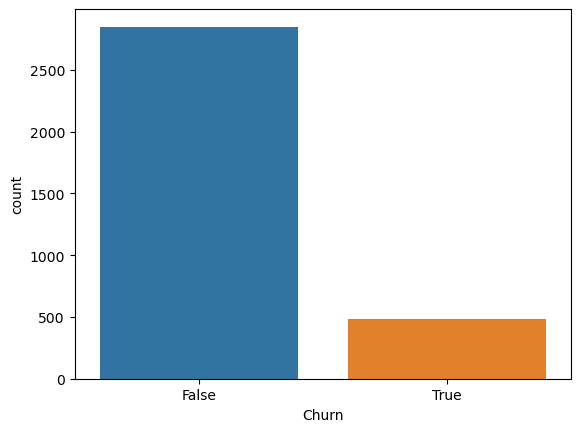

In [21]:
# count plot
sns.countplot(data=df,x='Churn')

*~ There are '2850' non churn and '483' churn customer.*

*~ Using Pie chart will show rate of churn customer*

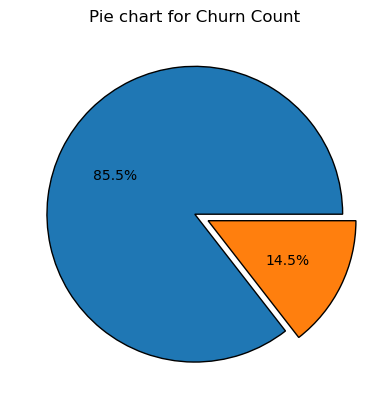

In [22]:
plt.pie(churn_count,explode=[0,0.1],autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})

plt.title('Pie chart for Churn Count')
plt.show()

*~ There are '14.5%' of people have churn. Further will analyze the more feature to observe the affectness to churn.*

### *2. Checking churn rate State wise:*

In [23]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [24]:
df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [25]:
statewise_churn = pd.crosstab(df['State'],df['Churn'])
statewise_churn.head()

Churn,False,True
State,,
AK,49,3
AL,72,8
AR,44,11
AZ,60,4
CA,25,9


<Axes: xlabel='State', ylabel='count'>

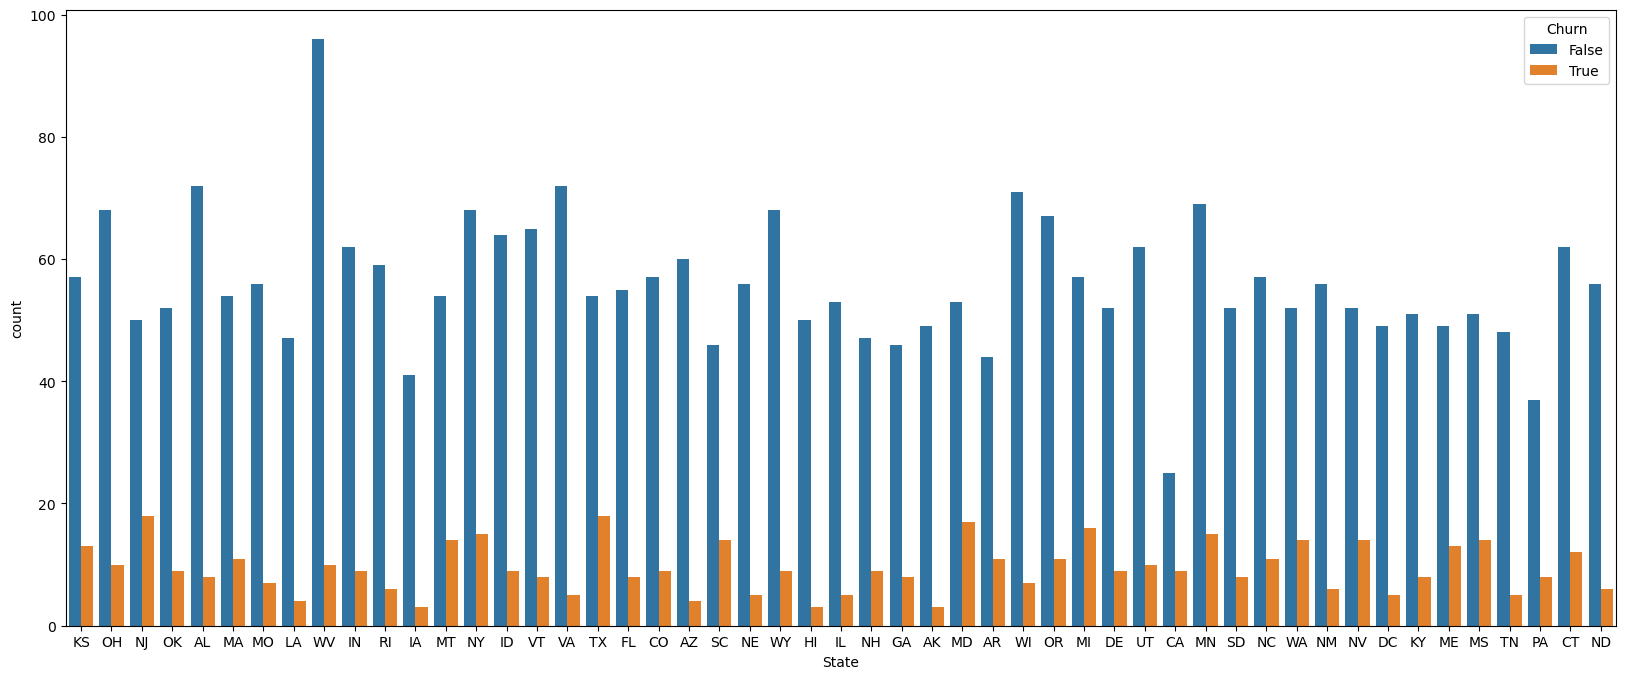

In [26]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x='State',hue='Churn')

### *Top most churn state:*

In [27]:
# data with churn customer
churn_df = df[df['Churn']==True]
churn_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True


In [28]:
# Top 10 most churn state
top_state = churn_df.groupby('State')['Churn'].count().sort_values(ascending=False).reset_index().head(10)
top_state

,State,Churn
0,NJ,18
1,TX,18
2,MD,17
3,MI,16
4,MN,15
5,NY,15
6,MT,14
7,NV,14
8,MS,14
9,SC,14


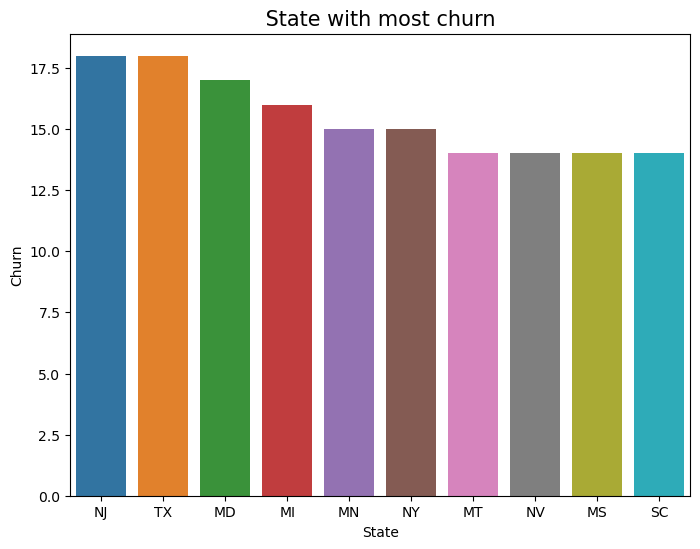

In [29]:
# To visualize the top 10 most churn state

plt.figure(figsize = (8,6))
sns.barplot(data = top_state, x = 'State', y = 'Churn')
plt.title(" State with most churn ", fontsize = 15)
plt.show()

In [30]:
print('Below are the state with highest churn: ')
print(top_state['State'].tolist())

Below are the state with highest churn: 
['NJ', 'TX', 'MD', 'MI', 'MN', 'NY', 'MT', 'NV', 'MS', 'SC']


### *State with low churn state:*

In [31]:
low_churn_state = churn_df.groupby('State')['Churn'].count().sort_values(ascending=True).reset_index().head(10)
low_churn_state

,State,Churn
0,AK,3
1,IA,3
2,HI,3
3,AZ,4
4,LA,4
5,NE,5
6,VA,5
7,TN,5
8,DC,5
9,IL,5


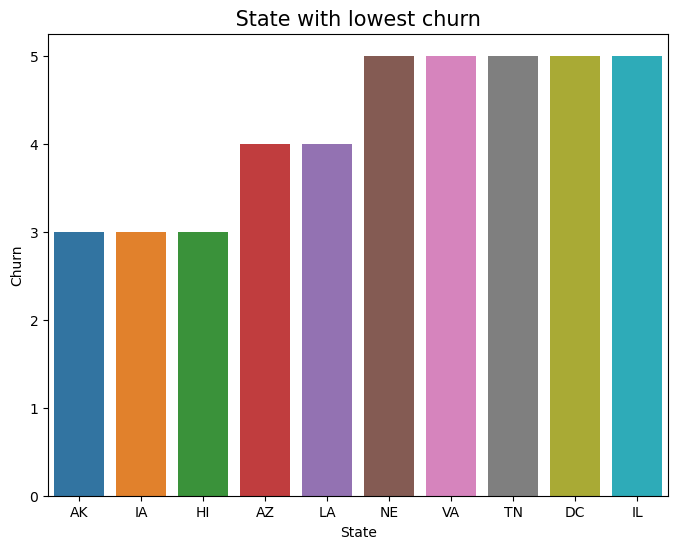

In [32]:
# To visualize the lowest 10 churn state

plt.figure(figsize = (8,6))
sns.barplot(data = low_churn_state, x = 'State', y = 'Churn')
plt.title(" State with lowest churn ", fontsize = 15)
plt.show()

In [33]:
print('Below are the state with lowest churn: ')
print(low_churn_state['State'].tolist())

Below are the state with lowest churn: 
['AK', 'IA', 'HI', 'AZ', 'LA', 'NE', 'VA', 'TN', 'DC', 'IL']


### *3. Area code wise churn:*

In [34]:

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [35]:
df['Area code'].unique().tolist()

[415, 408, 510]

In [36]:
acode_churn = pd.crosstab(df['Area code'],df['Churn'])
acode_churn

Churn,False,True
Area code,,
408,716,122
415,1419,236
510,715,125


<Axes: xlabel='Area code', ylabel='count'>

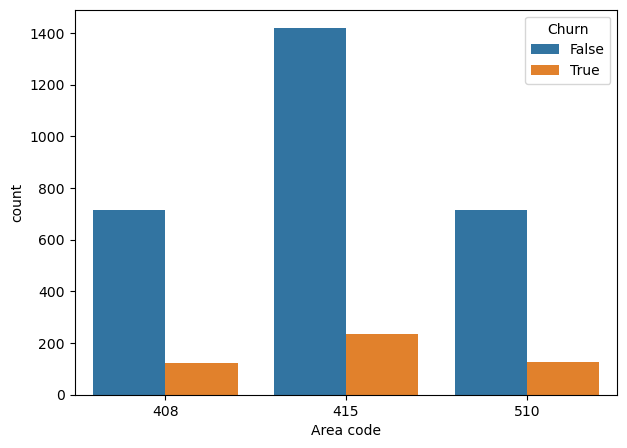

In [37]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='Area code',hue='Churn')

*~ Above observation suggest that Area code- '415' has higher number of customer and also with higher number of churn rate.*

### *4. Checking churn rate over International plans:*

In [38]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [39]:
intn_plan = df['International plan'].value_counts()
intn_plan

No     3010
Yes     323
Name: International plan, dtype: int64

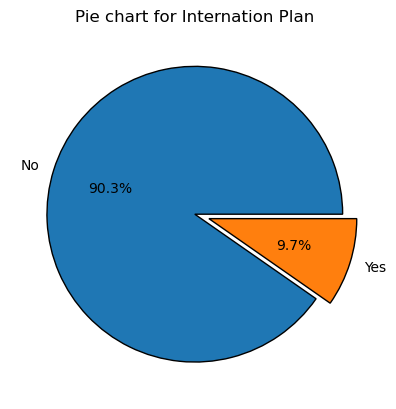

In [40]:
plt.pie(intn_plan,explode=[0,0.1],labels=['No','Yes'],autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})

plt.title('Pie chart for Internation Plan')
plt.show()

*~ Over '90.3 %' customer do not have the international plan.*

In [41]:
intn_plan_churn = pd.crosstab(df['International plan'],df['Churn'])
intn_plan_churn

Churn,False,True
International plan,,
No,2664,346
Yes,186,137


<Axes: xlabel='International plan', ylabel='count'>

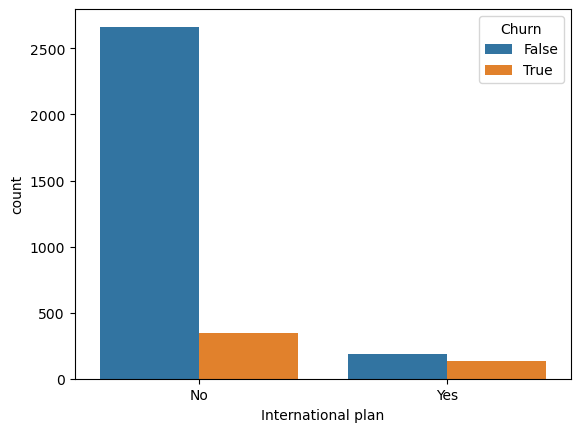

In [42]:
sns.countplot(data=df,x='International plan',hue='Churn')

*~ Above visualization says the rate of churn is higher from the customer who have international plan.*

### *Percentage of churn customer based on they do have international plan or not:*

In [44]:
# Customer who do not have international plan
churn_customer_without_plan = intn_plan_churn.iloc[0,1]
non_churn_customer_without_plan = intn_plan_churn.iloc[0,0]

In [45]:
slices = [churn_customer_without_plan,non_churn_customer_without_plan]

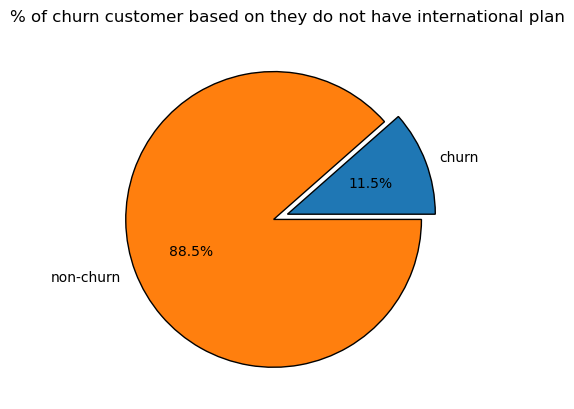

In [46]:
plt.pie(slices, labels=['churn','non-churn'],explode=[0,0.1],autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})

plt.title('% of churn customer based on they do not have international plan')
plt.show()

*~ Around '11.5%' customer have churn who dont have international plan.*

In [47]:
# Customer who do have international plan
churn_customer_with_plan = intn_plan_churn.iloc[1,1]
non_churn_customer_with_plan = intn_plan_churn.iloc[1,0]

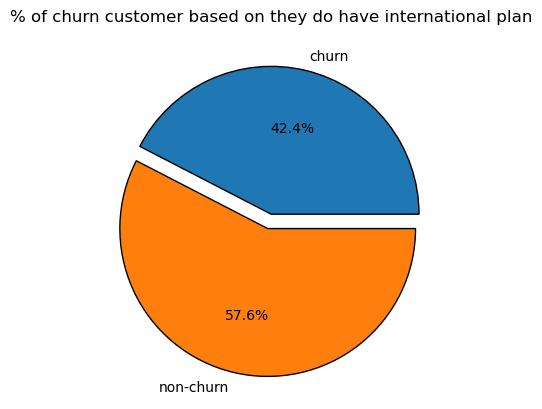

In [48]:
slices = [churn_customer_with_plan,non_churn_customer_with_plan]

plt.pie(slices, labels=['churn','non-churn'],explode=[0,0.1],autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})

plt.title('% of churn customer based on they do have international plan')
plt.show()

*~ Around '42.4%' customer have churn who dont have international plan.*  


### *5. Addressing issue of less usage international total minutes, total calls and total charge:*

In [49]:
intnl_df = df.loc[:,['Total intl minutes', 'Total intl calls', 'Total intl charge']]
intnl_df.head()

,Total intl minutes,Total intl calls,Total intl charge
0,10.0,3,2.70
1,13.7,3,3.70
2,12.2,5,3.29
3,6.6,7,1.78
4,10.1,3,2.73


In [50]:
intnl_df.describe()

,Total intl minutes,Total intl calls,Total intl charge
count,3333.000000,3333.000000,3333.000000
mean,10.237294,4.479448,2.764581
std,2.791840,2.461214,0.753773
min,0.000000,0.000000,0.000000
25%,8.500000,3.000000,2.300000
50%,10.300000,4.000000,2.780000
75%,12.100000,6.000000,3.270000
max,20.000000,20.000000,5.400000


*~ Observation:*  
   - Lower Usage of International Facility: Summary statistics show significantly fewer total minutes, calls, and charges for international calls compared to national calls. 
   
*~ Reasons for Low International Usage:*  
   - Cost Concerns: International calls are often perceived as expensive, deterring customers from using this facility.  
   - Communication Alternatives: Availability of cheaper or free communication alternatives like messaging apps or internet-based calls for international communication.  
   
*~ Provoking International Facility Usage:*
   - Cost-Effective Plans.  
   - Promotional Offers.  
   - Educational Campaigns.  

### *6. Voicemail wise churn:*

In [51]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [52]:
vmail_churn = pd.crosstab(df['Voice mail plan'],df['Churn'])
vmail_churn

Churn,False,True
Voice mail plan,,
No,2008,403
Yes,842,80


Text(0.5, 1.0, 'Voicemail wise Churn')

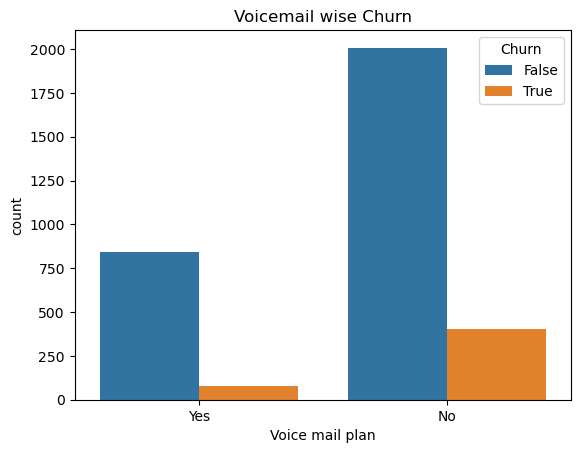

In [53]:
sns.countplot(data=df,x='Voice mail plan',hue='Churn')
plt.title('Voicemail wise Churn')

*~ Churning is more to the people who has no voice mail plan compared to the people who has voice mail plan.*

### *7. Account length (1-digit,2-digit,3-digit) wise churn:*

In [55]:
# One digit
one_digit_df = df[df['Account length'] <= 9]
one_digit_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
158,MO,6,510,No,No,0,183.6,117,31.21,256.7,72,21.82,178.6,79,8.04,10.2,2,2.75,1,False
671,CT,3,415,No,Yes,36,118.1,117,20.08,221.5,125,18.83,103.9,89,4.68,11.9,6,3.21,2,False
923,MS,1,415,No,No,0,144.8,107,24.62,112.5,66,9.56,218.7,79,9.84,13.8,3,3.73,1,False
960,AR,5,415,No,No,0,199.2,106,33.86,187.3,12,15.92,214.0,85,9.63,13.3,3,3.59,3,False
964,NY,9,408,No,Yes,31,193.8,130,32.95,202.6,98,17.22,191.2,102,8.60,13.3,2,3.59,1,False


In [56]:
# churning for one digit account length
one_digit_df["Churn"].value_counts()

False    22
True      2
Name: Churn, dtype: int64

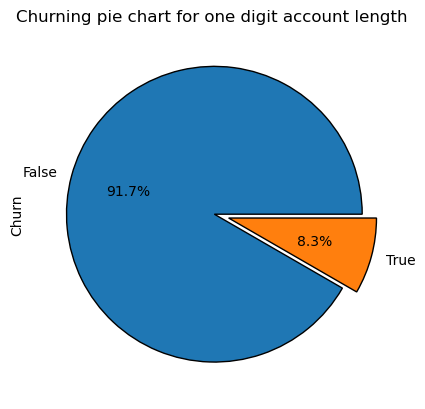

In [57]:
one_digit_df["Churn"].value_counts().plot(explode=[0,0.1],autopct='%1.1f%%',wedgeprops={'edgecolor':'black'},kind='pie')

plt.title('Churning pie chart for one digit account length ')
plt.show()

*~ Single-Digit Account Length (8.3% Churn Rate)*

In [58]:
# Two digit
two_digit_df = df[(df['Account length'] > 9) & (df['Account length'] <= 99) ]
two_digit_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
11,RI,74,415,No,No,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False
13,MT,95,510,No,No,0,156.6,88,26.62,247.6,75,21.05,192.3,115,8.65,12.3,5,3.32,3,False


In [59]:
# churning for two digit account length
two_digit_df["Churn"].value_counts()

False    1378
True      225
Name: Churn, dtype: int64

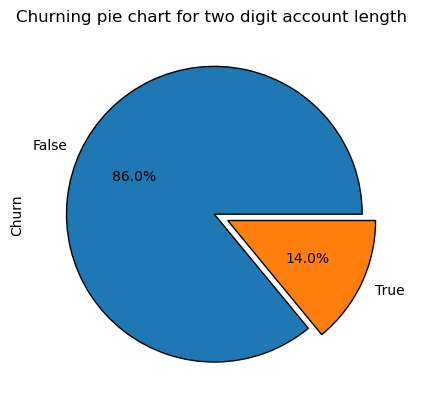

In [60]:
two_digit_df["Churn"].value_counts().plot(explode=[0,0.1],autopct='%1.1f%%',wedgeprops={'edgecolor':'black'},kind='pie')

plt.title('Churning pie chart for two digit account length ')
plt.show()

*~  Double-Digit Account Length (14% Churn Rate)*

In [61]:
# Three digit
three_digit_df = df[df['Account length'] > 99 ]
three_digit_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False


In [62]:
# churning for three digit account length
three_digit_df["Churn"].value_counts()

False    1450
True      256
Name: Churn, dtype: int64

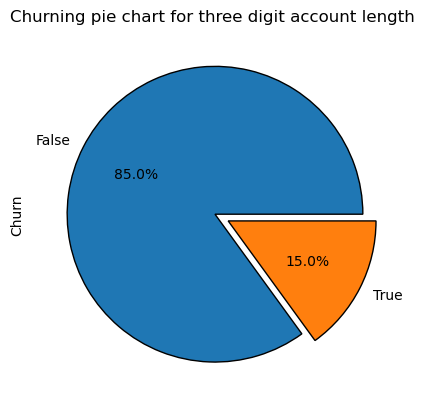

In [63]:
three_digit_df["Churn"].value_counts().plot(explode=[0,0.1],autopct='%1.1f%%',wedgeprops={'edgecolor':'black'},kind='pie')

plt.title('Churning pie chart for three digit account length ')
plt.show()

*~ Triple-Digit Account Length (15% Churn Rate)*

*~ Observation:*  
   -  Newer customers seem less likely to churn compared to those with longer account lengths.
   
*~ Suggestions to preventing churn:*
   - Get feedback to solve problems or meet new needs as customers continue using our service.

   - Create special events or offers to reconnect with customers who have been around for a while.

   - Give rewards or special benefits to encourage customers who've been with us for a long time to keep using our service.

### *8. Camparision between minutes,call,charge in respective of day,evening,night:*

In [65]:
camp_df = df.loc[:,['Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls','Total eve charge','Total night minutes','Total night calls','Total night charge',]]
camp_df.head()

,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge
0,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01
1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45
2,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32
3,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86
4,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41


In [66]:
camp_df.describe()

,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325
std,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000
25%,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000
50%,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000
75%,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000
max,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000


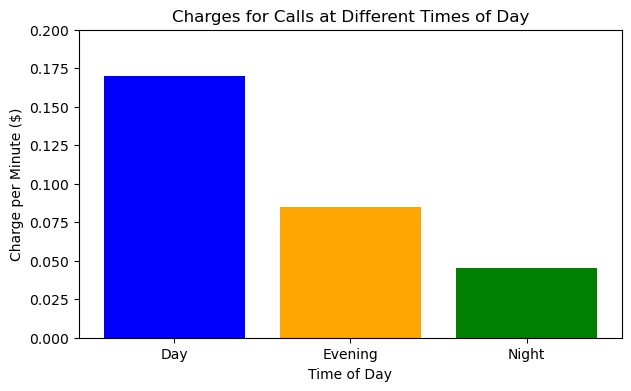

In [86]:
# Define data
times_of_day = ['Day', 'Evening', 'Night']
charges_per_minute = [0.17, 0.0849, 0.0450]

# Create bar chart
plt.figure(figsize=(7, 4))
plt.bar(times_of_day, charges_per_minute, color=['blue', 'orange', 'green'])
plt.title('Charges for Calls at Different Times of Day')
plt.xlabel('Time of Day')
plt.ylabel('Charge per Minute ($)')
plt.ylim(0, 0.2)  # Set y-axis limit for better visualization
plt.show()


*~ Observation:*  
   - The average call durations for day, evening, and night are close to each other.
   - However, the charges per minute vary significantly higher during the day and lower during the evening and night.
   - The formula to calculate the total charge of a call is:  
     Total charge = Call duration in minutes × Cost per minute
   - Charges for calls are: for day - 0.17/min, for eve - 0.0849/min and for night - 0.0450/min.

*~ Solutions:*
   - Encourage usage during evening and night by highlighting the lower cost per minute.
   - Offer special packages or discounts during these lower-cost periods to incentivize more usage.
   - Inform customers about the cost benefits of making calls during off-peak hours to drive more usage during those times.


### *9. Customer service call based Churn:*

In [78]:
pd.crosstab(df['Customer service calls'],df['Churn'])

Churn,False,True
Customer service calls,,
0,605,92
1,1059,122
2,672,87
3,385,44
4,90,76
5,26,40
6,8,14
7,4,5
8,1,1


<Axes: xlabel='Customer service calls', ylabel='count'>

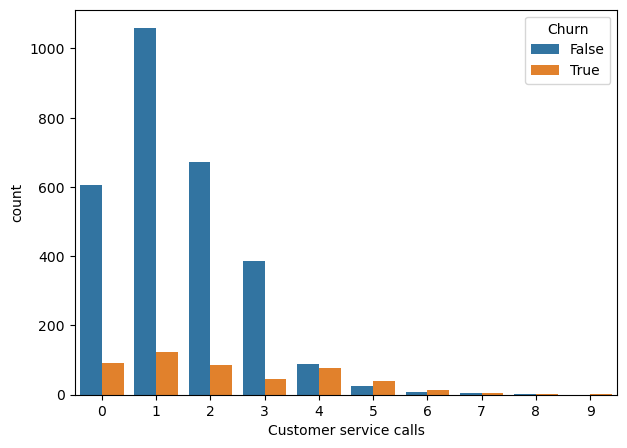

In [81]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='Customer service calls',hue='Churn')

*~ The data displays the relationship between the number of customer service calls made and whether customers churned or not.*

*~ Observations:*  
   -  When customers make lots of calls to customer service, they're more likely to leave.
   -  The leaving rate gets highest when people call customer service about 3 or 4 times.  

*~ Suggestions to enhance service call, not to impact on churning:*    
   - Make it easier for people when they call for help, so they don't have to call again and again.
   - Get input from customers who call us a lot to really understand what's bothering them.
   - Figuring out exactly what's bothering customers who call a lot can help us create solutions that actually work for them.

## Solutions to Business Objective:

 - Keep New Customers engaged: We'll focus on making sure new customers feel valued and satisfied right from the start to encourage them to stay.  
 
 
 - Fairer Call Charges: We aim to make call charges fairer throughout the day, evening, and night to encourage everyone to call when it suits them best.  
 
 
 - Smarter Support: We'll work on making our customer service more effective so that people don't need to call too many times, reducing frustrations and the chance of them leaving.
 

*By prioritizing new customers' satisfaction, making calling fairer for everyone, and improving customer service to reduce repeated calls, we're aiming to keep more customers happy and loyal.*

## Conclusion:

*After a comprehensive analysis of telecom churn data, several crucial insights have surfaced. Identifying key factors contributing to customer churn such as pricing plans, customer service quality, and many more. By understanding customer behavior patterns, strategies can be devised to reduce churn rates.*  

*It's all about making customers feel special! By tailoring offers and reaching out in a personal way, like with targeted campaigns, telecom companies can keep folks from switching. When businesses take the time to solve customer problems before they become deal-breakers, it builds trust and keeps people sticking around. Basically, it's about making those real connections and giving customers what they need to stick with your service for the long haul in the competitive telecom world.*